<a href="https://colab.research.google.com/github/Projas-14/ADA-informes/blob/main/Informe_4_BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paul Rojas Ojeda 
19.263.734-1



# Explicacion del problema.
Tenemos un arreglo de tamaño n distribuido de forma aletoria.
Entrada $[a_1,a_2,...,a_n]$
y se busca retornar un arreglo de tamaño n ordenado de menor a mayor.
Salida $[a'_1,a'_2,...,a'_n]$ de tal manera que $a'_1 \leq a'_2 \leq ... \leq a'_n$.


**BucketSort** es un algoritmo de clasificación que funciona distribuyendo los elementos de una matriz en una serie de bucket (cubetas). 
Luego, cada depósito se clasifica individualmente, ya sea utilizando un algoritmo de clasificación diferente o aplicando recursivamente el algoritmo de clasificación de depósitos. 
Para la realización del ordenamiento se dara con el metodo *InsertionSort* el cual como se tiene que obtener una ordenación de distribución, se acopla bien con *BucketSort* , debido que una generalización de la ordenación de casilleros que permite múltiples claves por cubo.

Comentando que el metodo *Bucketsort* sera utilizados para elementos mayor a 0, es decir que no se permitiran numeros negativos y en este informe veremos con numeros decimales dicha distribución.

La implementacion de algoritmo sera para ordenar $n$ elementos:

1. Se divide el rango de los elementos en $n$ sub-intervalos de igual tamaño. Cada subintervalo se asocia a un balde o **bucket**, en este caso sera 0 - 9 (Baldes).
2. Se recorre la matriz y se van colocando los elementos ordenados en sus buckets correspondiente. (ejemplo 0.12 ira en el balde 1)
3. Con el metodo insertionSort este ordena cada bucket para que en su interior sea ordenado.
4. Al finalizar, se concatenan los buckets generando la secuencia ordenada.

## 1. Implemente la función BucketSort.
En el siguiente codigo implementado sera para datos decimales $0<dato<1$ con la finalidad de ordenar estos datos de menor a mayor.

In [ ]:
import random
from termcolor import colored
import copy

def insertionSort(b):
    for i in range(1, len(b)):
        subir = b[i]
        j = i - 1
        while j >= 0 and b[j] > subir: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = subir     
    return b     

def bucketSort(x, verbose=False):
    arr = []
    ranuras = 10 # 10 ranuras

    for i in range(ranuras):
        arr.append([])
         

    # los elementos de la matriz en diferentes cubos 
    i = 1
    for j in x:

        index_b = int(ranuras * j) 
        arr[index_b].append(j)
        if verbose == True : 
          i += 1
          print(" dato almacenado", colored(f"{str(arr[index_b])}","red"),"en el bucket: ", int(ranuras * j) , "\n Bucket distribuidos", colored(f"{str(arr)}","blue") )

      
    # Ordenar cubos individuales
    j=0
    for i in range(ranuras):
        arr[i] = insertionSort(arr[i])
        if verbose == True : 
          j += 1
          print(j," Bucket ordenado", colored(f"{str(arr[i])}","red"))

          
    # concatenar el resultado
    k = 0
    for i in range(ranuras):
        for j in range(len(arr[i])):
            x[k] = arr[i][j]
            if verbose == True :
              print("Matriz ordenandose", colored(f"{str(x[:k+1])}","green"))
            k += 1
    
    if verbose == True :
      print("Matriz  ordenanda: ", colored(f"{str(x)}","blue"))
    
    return x

In [ ]:
x = [0.897, 0.565, 0.666, 0.1234, 0.655, 0.3434] 
print("Matriz de entrada: ",x)
bucketSort(x, True)


Matriz de entrada:  [0.897, 0.565, 0.666, 0.1234, 0.655, 0.3434]
 dato almacenado [0.897] en el bucket:  8 
 Bucket distribuidos [[], [], [], [], [], [], [], [], [0.897], []]
 dato almacenado [0.565] en el bucket:  5 
 Bucket distribuidos [[], [], [], [], [], [0.565], [], [], [0.897], []]
 dato almacenado [0.666] en el bucket:  6 
 Bucket distribuidos [[], [], [], [], [], [0.565], [0.666], [], [0.897], []]
 dato almacenado [0.1234] en el bucket:  1 
 Bucket distribuidos [[], [0.1234], [], [], [], [0.565], [0.666], [], [0.897], []]
 dato almacenado [0.666, 0.655] en el bucket:  6 
 Bucket distribuidos [[], [0.1234], [], [], [], [0.565], [0.666, 0.655], [], [0.897], []]
 dato almacenado [0.3434] en el bucket:  3 
 Bucket distribuidos [[], [0.1234], [], [0.3434], [], [0.565], [0.666, 0.655], [], [0.897], []]
1  Bucket ordenado []
2  Bucket ordenado [0.1234]
3  Bucket ordenado []
4  Bucket ordenado [0.3434]
5  Bucket ordenado []
6  Bucket ordenado [0.565]
7  Bucket ordenado [0.655, 0.666]


[0.1234, 0.3434, 0.565, 0.655, 0.666, 0.897]

**Funcionamiento de Bucketsort**
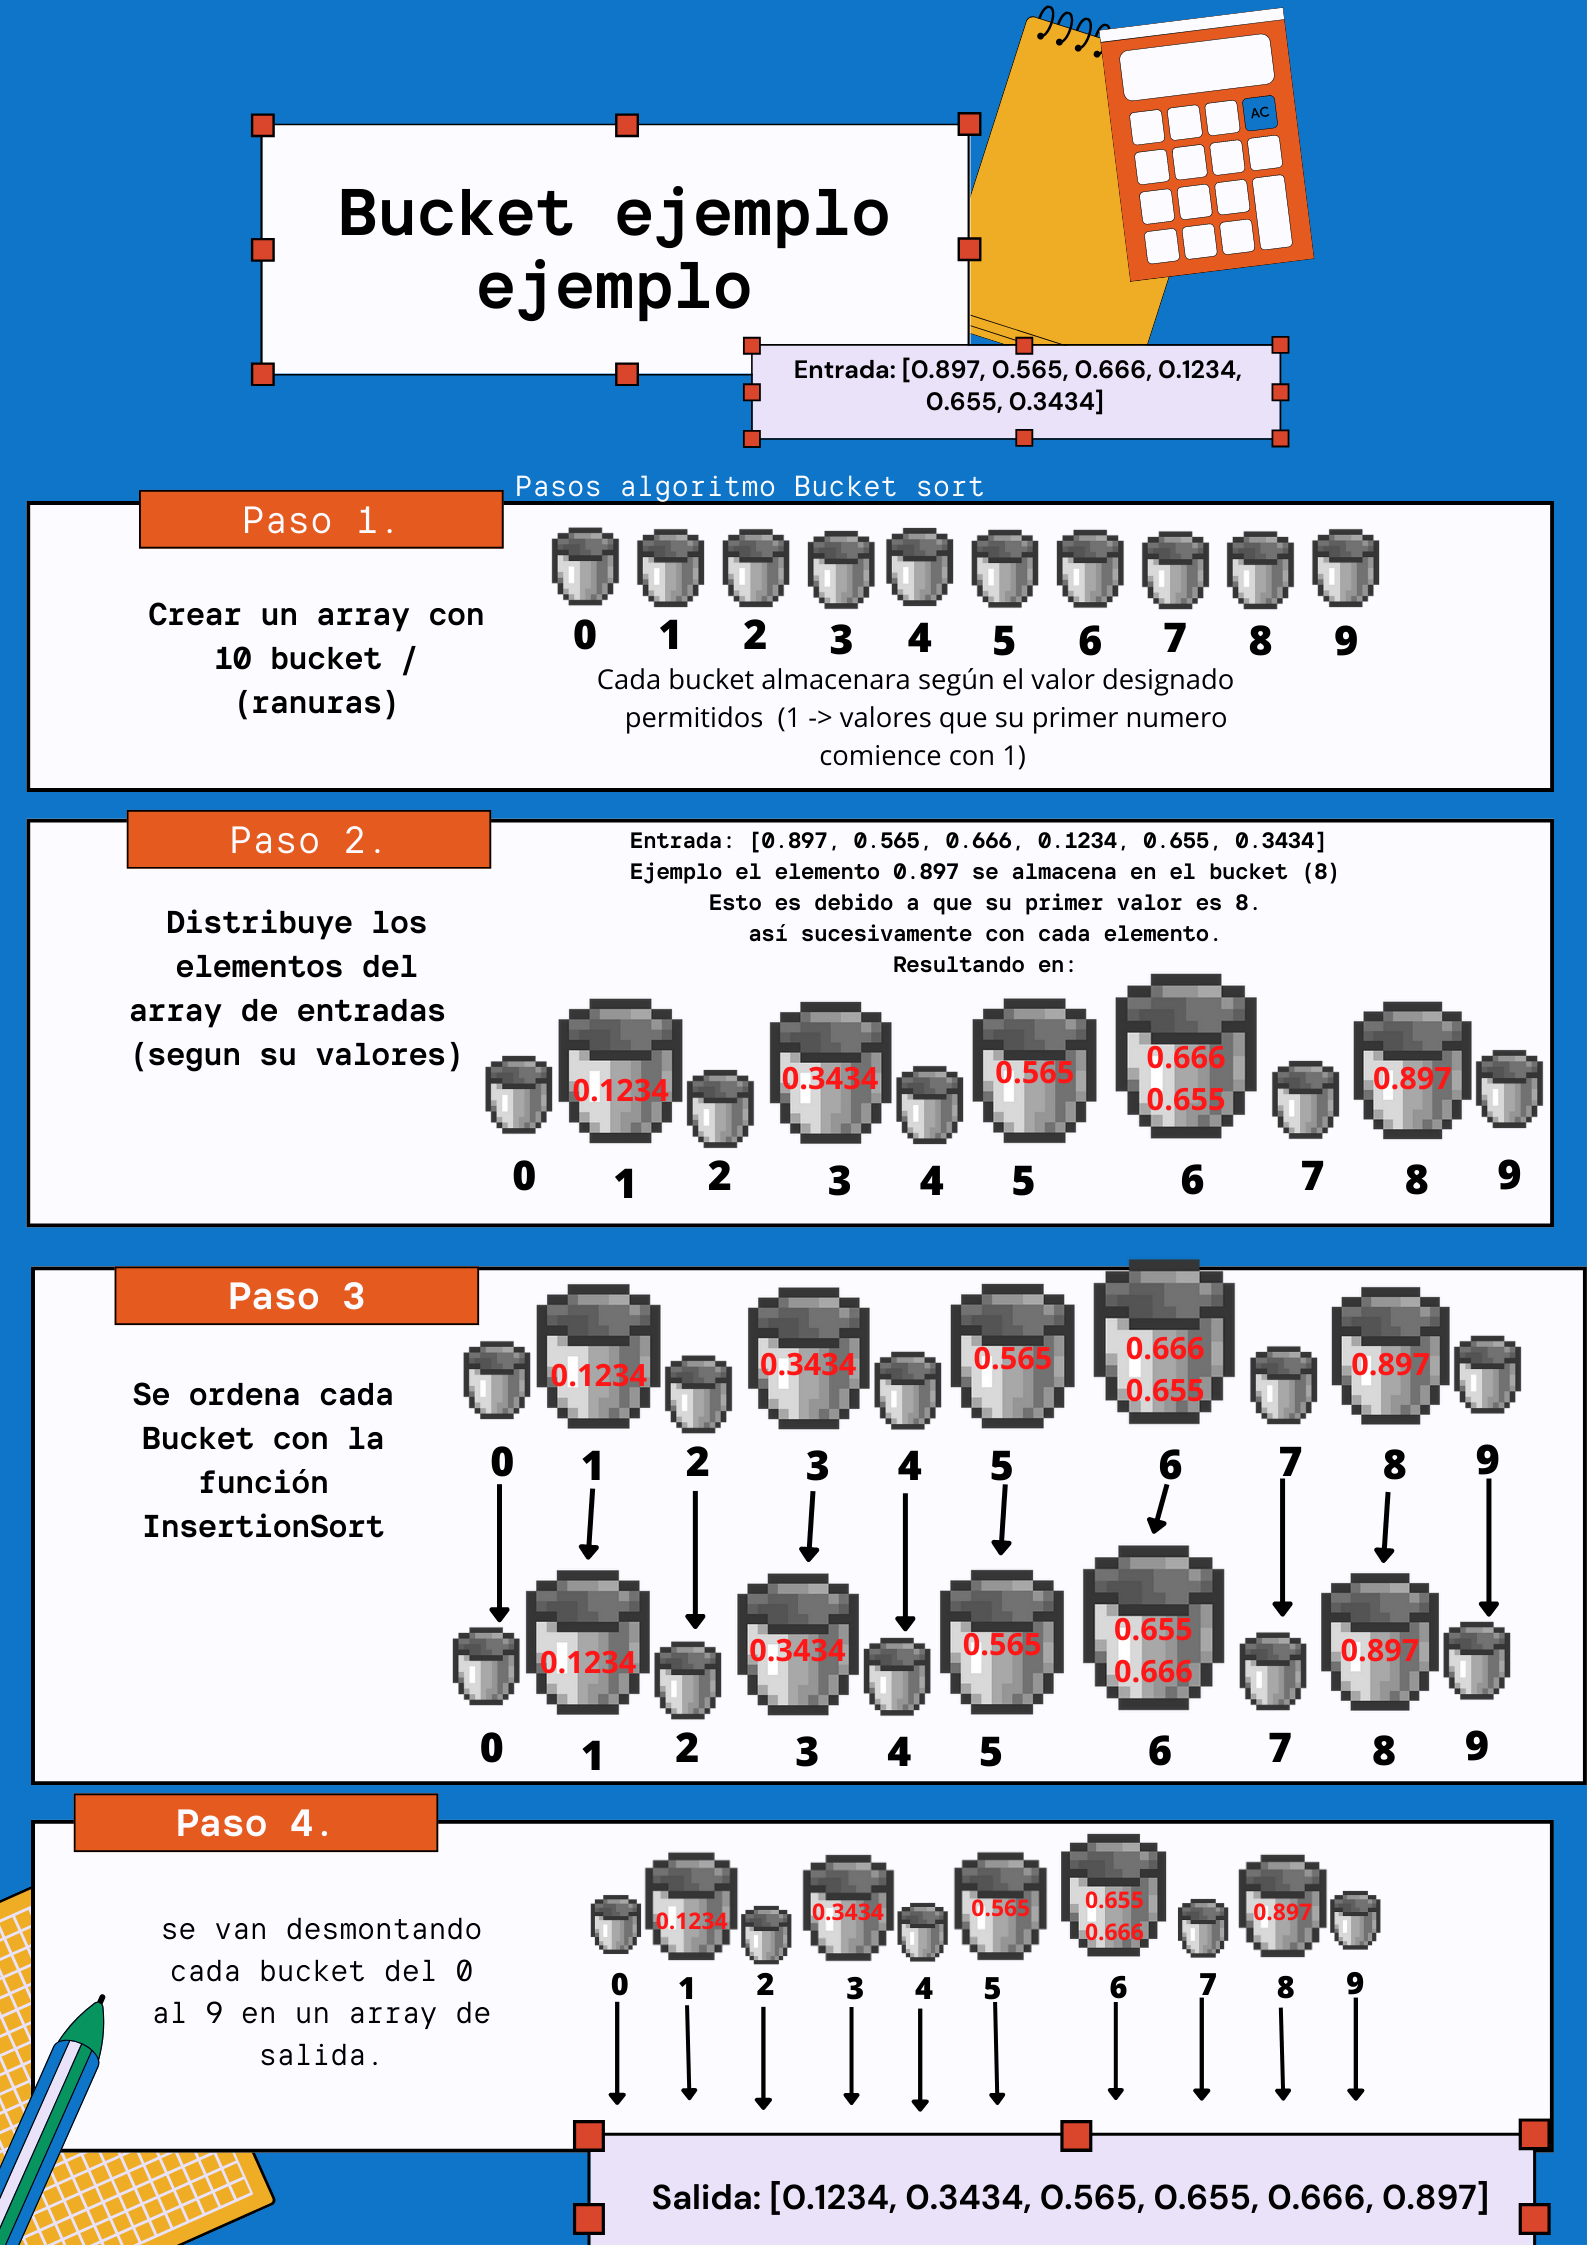

# 2. Explique por qué el algoritmo es correcto (prueba de correctitud).

Teorema 1
Cada elemento al momento de ser colacado en el bucket seran menor al siguiente de tal manera que:

> Considere dos elementos (A es unn arreglo donde en su interior se encuentra los bucket) entonces tenemos que $A[i]$ y $A[j]$ en el arreglo de entrada sin perdida de generalidad asuma que $A[i] \leq A[k]$

propiedad invariente de bucle.
Al comienzo de i-ésima iteracion de bucketSort:

se asume que las entradas de los arreglos esta ordenadas por lo que tenemos que el siguiente elemento es mayor al i-ésimo de los elementos ya ordenados.

de esta forma en cada iteracion obtendremos que el siguiente elemento sera mayor a los de nuestro arreglo ordenado por lo que se cumple con la propiedad de bucle y el algoritmo es correcto.

Inicializacion


Mantencion

1. $i<$ tamaño de A y $i!= i+1$ la posición de I incrementa debido al tamaño del a
que es el arreglo de datos que tenemos de eso depende el incremento de I en este
caso hasta que la función no se cumpla deja de incrementar su valor del orden n+1.

2. bucket $[A[i]] = bucket[A[i]] +1$; el bucket en la posición a[i]que sería el numero de la
posición a[i] incrementa en el orden n+1 hasta que el ciclo termine o mientras I es
menor que el tamaño del arreglo de a. 

2. i < tamaño del bucket; i := i+1 la posición de I incrementa debido al tamaño del
bucket de eso depende el incremento de I en este caso hasta que la función no se
cumpla deja de incrementar su valor del orden n+1 

3. el bucket va a decrementar en cada cilco -1 para
acomodar el numero dentro de un grupo y hace la comparación hasta que el
bucket en la posición [i] sea menor o igual a cero

4. a[j++]:=i en la posición j del vector a se incorporara o se insertara el numero ya
organizado, j es una varia ble que esta en el for externo y esta definida que es el
numero del ciclo externo que va a ser la posición en el arreglo ya que ahí se
insertara el numero con su respectivo orden para después ser mostrado 

Finalizando con A[] con el arreglo completamente organizado de menor a mayor.



**Induccion para probar la correctitud.**

Ahora para probar una declaracion  p(n) , para todos los números decimales n:

* Base: se demuestra que p(n) para un caso ejemplo p(1).



> si n=1 el algoritmo bucket se retorna el unico elemento, por lo cual se cumple P(1). y cumple que esta ordenado.



* Paso inductivo como se demostro que p(n+1) se cumple entonces por hipótesis inductiva  p(n)  tambien se cumple, de tal manera que  $ n < n+1$ entonces  p(n+1)  tambien lo es.

para demostrar que se cumple p(n+1)  consideremos los casos $[nA[i]] < [nA[j]]$ (es decir que cada datos anterior sera menor al proximo)

Entonces pone al elemento A[i] en un bucket anterior al bucket A[j], de este modo A[i] aparece antes que A[j] en la salida cumpliendose nuestra hipositesis principal.
Como se ilustra en la imagen. 











# 3. Analice el tiempo de ejecución del algoritmo.

Para analizar el tiempo de ejecución del algoritmo BucketSort podremos analizar los pasos que se tienen que dar 
El algoritmo BucketSort recibe una matriz de largo n.
donde se realizaran los siguentes paso:

1) Crear n cubos vacíos (o listas).
2) Haga lo siguiente para cada elemento de la matriz arr[i].


> a) Insertar arr[i] en el cubo [n*array[i]]


3) Clasifica los cubos individuales utilizando la ordenación por InsertionSort.

4) Concatenar todos los cubos ordenados.

Analisis por paso.

Complejidad del tiempo: si asumimos que la inserción en un cubo toma un tiempo $O(1)$, entonces los pasos 1 y 2 del algoritmo anterior claramente toman un tiempo $O(n)$. El $O(1)$ es fácilmente posible si usamos una lista enlazada para representar un depósito.
El paso 4 también requiere tiempo $O(n)$, ya que habrá n elementos en todos los cubos. 

Para el paso 3(insertion Sort) también lleva tiempo O(n) en promedio si todos los números están distribuidos uniformemente

De esta manera nos da $O(n + ((n^2)/k) + k)$

En el mejor de los casos k tenderá a n, si es así el tiempo de ejecución es O(n)

**Caso promedio** Como estamos hablando del tiempo promedio, la expectativa $O(n)$ tiene que ser evaluado en su lugar. Dejar $ X_{ji}$ Sea la variable aleatoria que es 1 si elemento j se coloca en un balde[i] y 0 de lo contrario tenemos $n_i = \sum_{j=1}^n X_{ij} $ por lo tanto.

$\begin{align}
E(n_i^2) & = E\left(\sum_{j=1}^n X_{ij} \sum_{k=1}^n X_{ik}\right) \\
& = E\left(\sum_{j=1}^n \sum_{k=1}^n X_{ij}X_{ik}\right) \\
& = E\left(\sum_{j=1}^n X_{ij}^2\right) + E\left(\sum_{1\leq j,k\leq n}\sum_{j\neq k}X_{ij}X_{ik}\right)
\end{align}$

La última línea separa la suma en el caso. $j = k$ y el caso $ j \neq k$. Dado que la posibilidad de que un objeto se distribuya al cubo[i] es $ 1/k, X_{i,j}$ es 1 con porbabilidad $1/k$ y 0 en caso contrario.


$E(X_{ij}^2) = 1^2\cdot \left(\frac{1}{k}\right) + 0^2\cdot \left(1-\frac{1}{k}\right) = \frac{1}{k}$

$ E(X_{ij}X_{ik}) = 1\cdot \left(\frac{1}{k}\right)\left(\frac{1}{k}\right) = \frac{1}{k^2} $

Con la suma seria

$E\left(\sum_{j=1}^n X_{ij}^2\right) + E\left(\sum_{1\leq j,k\leq n}\sum_{j\neq k}X_{ij}X_{ik}\right) = n\cdot\frac{1}{k} + n(n-1)\cdot\frac{1}{k^2} = \frac{n^2+nk-n}{k^2}$

Finalmente, la complejidad sería

$O\left(\sum_{i=1}^kE(n_i^2)\right) = O\left(\sum_{i=1}^k \frac{n^2+nk-n}{k^2}\right) = O\left(\frac{n^2}{k}+n\right) $.

El último paso de la clasificación de cubos, que consiste en **concatenar** todos los objetos ordenados en cada cubo, requiere $O(K)$ tiempo. Por lo tanto, la complejidad total es $O\left(n+\frac{n^2}{k}+k\right)$. Tenga en cuenta que si se elige K para que sea $k = \Theta(n)$, luego se ejecuta la ordenación de depostios $O(n)$ tiempo pronedio, dada una entrada uniformemente distribuidad.

# 4. Experimentos



Analisis de BucketSort VS RadixSort con CountingSort para numeros enteros mayores a 0 y veremos su tiempo de ejecución.

Tamaño de problema con n∈[10,99].


In [ ]:
def countingSort(arr, exp1):
 
    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(0, len(arr)):
        arr[i] = output[i]
 
def radixSort(arr):
    max1 = max(arr)
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10
    return arr

arr = [170, 45, 75, 90, 802, 24, 2, 66]
print(radixSort(arr))
 

[2, 24, 45, 66, 75, 90, 170, 802]


In [ ]:
def insertionSort(b):
    for i in range(1, len(b)):
        subir = b[i]
        j = i - 1
        while j >= 0 and b[j] > subir: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = subir     
    return b     

def bucketSort(x, verbose=False):
    arr = []
    ranuras = 10 # 10 ranuras

    for i in range(ranuras):
        arr.append([])
         

          
    # los elementos de la matriz en diferentes cubos 
    i = 1
    for j in x:

        index_b = int(ranuras / j) 
        arr[index_b].append(j)
        if verbose == True : 
          i += 1
          print(i," Bucket almacenado", colored(f"{str(arr[index_b])}","red"), "\n Bucket distribuidos", colored(f"{str(arr)}","blue") )






      
    # Ordenar cubos individuales
    j=0
    for i in range(ranuras):
        arr[i] = insertionSort(arr[i])
        if verbose == True : 
          j += 1
          print(j," Bucket ordenado", colored(f"{str(arr[i])}","red"))

          
    # concatenar el resultado
    k = 0
    for i in range(ranuras):
        for j in range(len(arr[i])):
            x[k] = arr[i][j]
            if verbose == True :
              print("Matriz ordenandose", colored(f"{str(x[:k+1])}","green"))
            k += 1
    
    if verbose == True :
      print("Matriz  ordenanda: ", colored(f"{str(x)}","blue"))
    
    return x

In [ ]:

arr = [17, 45, 75, 90, 80, 24, 20, 66]
print(bucketSort(arr))

[17, 20, 24, 45, 66, 75, 80, 90]


**BucketSort** para numeros enteros entre $10 ≤ dato \leq 99$
con la finalidad de demostrar que los datos sean bien ordenados.

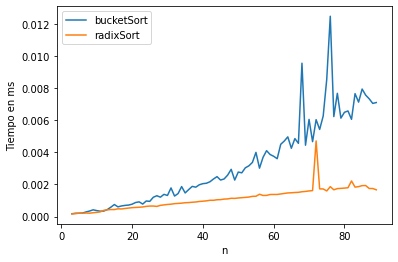

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_bucketSort = []
y_radixSort = []

for n in range(3,90):

  a = random.sample(range(10, 99), n)
  b = deepcopy(a)


  t_bucketSort = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)

  t_radixSort = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({b})", repeat=1, number=10)

  x.append(n)
  y_bucketSort.append(t_bucketSort)
  y_radixSort.append(t_radixSort)


plt.plot(x,y_bucketSort)
plt.plot(x,y_radixSort)
plt.legend(["bucketSort", "radixSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Comparación:
En el siguiente gráfico se compara el tiempo de ejecución del algoritmo BucketSort con el RadixSort en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 3 y 90.

Análisis de resultados
Se puede apreciar en el gráfico que ante los mismos arreglos generados aleatoriamente, el algoritmo BucketSort, incrementa de forma mas elevada su tiempo en ejecución, siendo muy notable a diferencia del algoritmo RadixSort, el cual su incremento es menor.

Lo que indica que con una mayor cantidad de elementos se vuelve más óptima la utilización del algoritmo RadixSort.

Tambien se observa un Peaks en el tiempo de ejecucion de para ambos algoritmo esto puede ser por el procedimiento que ocupan recurso del procesador u otro comportamiento irregular, no obstante se aprecia que en el BucketSort este peak se puede deber que se formaran buckets donde se almaceno todos los datos o gran cantidad de elementos en un bucket.



# **Analisis de BucketSort VS MergeSort vs Heapsort** 
Para numeros enteros mayores a 0 y veremos su tiempo de ejecución.
Tamaño de problema con n∈[10,99].



**Implementación de HeapSort**

In [ ]:
def heapify(arr, N, i):
    largest = i  
    l = 2 * i + 1     
    r = 2 * i + 2     

    if l < N and arr[largest] < arr[l]:
        largest = l
 
    if r < N and arr[largest] < arr[r]:
        largest = r
 
    
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
 
        heapify(arr, N, largest)
 
def heapSort(arr):
    N = len(arr)
 
    for i in range(N//2 - 1, -1, -1):
        heapify(arr, N, i)
 
    for i in range(N-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

Implementación de **MergeSort**

In [ ]:
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        mergeSort(L)
        mergeSort(R)
  
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
  
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

La idea de este experimentos es observar que sucede con metodos de ordenamiento de complejidad O(n) (BucketSort) v/s O(nlog(n)) (Merge y heapSort) con la finalidad de saber si su tiempo de ejecución varia segun su complejidad.


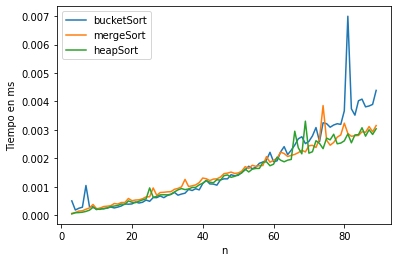

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_bucketSort = []
y_mergeSort = []
y_heapSort = []

for n in range(3,90):

  a = random.sample(range(10, 99), n)
  b = deepcopy(a)


  t_bucketSort = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)

  t_mergeSort = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({b})", repeat=1, number=10)

  t_heapSort = repeat(setup="from __main__ import heapSort", stmt=f"heapSort({b})", repeat=1, number=10)

  x.append(n)
  y_bucketSort.append(t_bucketSort)
  y_mergeSort.append(t_mergeSort)
  y_heapSort.append(t_heapSort)


plt.plot(x,y_bucketSort)
plt.plot(x,y_mergeSort)
plt.plot(x,y_heapSort)
plt.legend(["bucketSort", "mergeSort", "heapSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Análisis de resultados
Se puede apreciar en el gráfico que ante los mismos arreglos generados aleatoriamente, el algoritmo BucketSort cuando la entrada de datos es mayor se elevada su tiempo en ejecución, esto puede ser por encontrarse con demasiados elementos agrupado en un mismo bucket siendo de este modo dependiente del insertionsort, de modo de que su complejidad sera mas parecida a esté algoritmo $O(nˆ2)$.

En el caso de Merge y heap se comportan de manera muy similar esto se debe que al ser algoritmo recursivo siempre se cumple que su complejidad $O(nlog(n))$, entonces las variaciones entre ellas no sera muy notable.

Tambien se observa un Peaks en el tiempo de ejecucion de para ambos algoritmo esto puede ser por el procedimiento que ocupan recurso del procesador u otro comportamiento irregular, no obstante se aprecia que en el BucketSort este peak se puede dar directamente por un caso de que se formaran buckets donde se almaceno todos los datos o gran cantidad de elementos en un solo bucket, entonces de ser asi solo depende de *InsertionSort*.

